In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from autotst.reaction import *

In [2]:
rxn = AutoTST_Reaction("C#CC+[O]O_C#C[CH2]+OO", "H_Abstraction")

thermo.py:839 loadLibraries INFO Loading thermodynamics library from primaryThermoLibrary.py in /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from CBS_QB3_1dHR.py in /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/libraries...
thermo.py:856 loadGroups INFO Loading thermodynamics group database from /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/groups...
transport.py:294 loadGroups INFO Loading transport group database from /Users/nathan/Code/RMG-Py/../RMG-database/input/transport/groups...
database.py:167 loadFamilies INFO Loading the user-specified kinetics families from /Users/nathan/Code/RMG-Py/../RMG-database/input/kinetics/families
statmech.py:526 loadGroups INFO Loading frequencies group database from /Users/nathan/

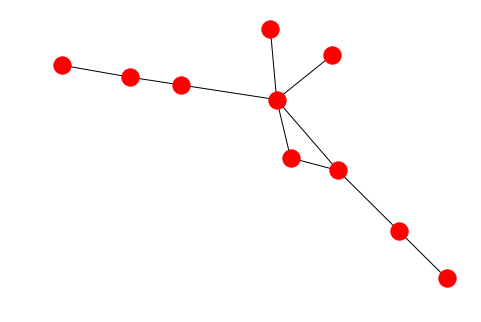

In [3]:
g = nx.Graph()

rdkit_mol = rxn.ts.create_pseudo_geometry()

for i, atom in enumerate(rdkit_mol.GetAtoms()):
    g.add_node(atom.GetIdx(), 
               atomic_num=atom.GetAtomicNum(), 
               radical_count=rxn.ts.rmg_ts.atoms[i].radicalElectrons,
               label=rxn.ts.rmg_ts.atoms[i].label)
    
for bond in rdkit_mol.GetBonds():
    if (((rxn.ts.rmg_ts.atoms[bond.GetBeginAtomIdx()].label == "*1") and 
        (rxn.ts.rmg_ts.atoms[bond.GetEndAtomIdx()].label == "*2")) or 
        ((rxn.ts.rmg_ts.atoms[bond.GetBeginAtomIdx()].label == "*2") and 
        (rxn.ts.rmg_ts.atoms[bond.GetEndAtomIdx()].label == "*1"))):
        label = "12"
        
    elif (((rxn.ts.rmg_ts.atoms[bond.GetBeginAtomIdx()].label == "*3") and 
        (rxn.ts.rmg_ts.atoms[bond.GetEndAtomIdx()].label == "*2")) or 
        ((rxn.ts.rmg_ts.atoms[bond.GetBeginAtomIdx()].label == "*2") and 
        (rxn.ts.rmg_ts.atoms[bond.GetEndAtomIdx()].label == "*3"))):
        label = "23"
        
        
    else:
        label = ""

    g.add_edge(*(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()), weight=int(bond.GetBondType()), label=label)

g.add_edge(*(rxn.ts.rmg_ts.getLabeledAtom("*1").sortingLabel, rxn.ts.rmg_ts.getLabeledAtom("*3").sortingLabel), weight=int(1), label="13")   
nx.draw(g)

In [4]:
nx.write_gexf(g, rxn.label + ".gexf")